# Project: TMDB Movies Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Intro**: We have Movies data set, This data set contains information about 10,000 movies collected from "The Movie Database (TMDb)",including user ratings and revenue.

#### Questions to ask:
> <ol>
    <li>Which geners are produced from year to year?</li>
    <li>How is popularity trending over time?</li>
    <li>Do top ratings movies always generate big revenue?</li>
    <li>Do higher budget movies always generate big revenue?</li>
    <li>Which is the largest genres from production view?</li>
    <li>What is the biggest company in movie industry?</li>
    <li>Most Popular Directors?</li>
 </ol>    




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


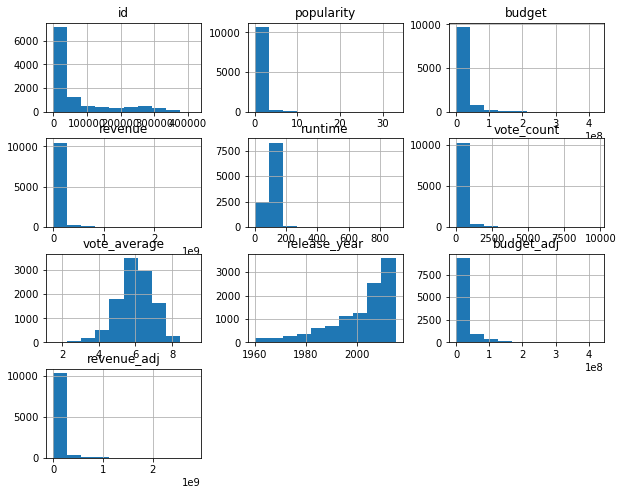

In [6]:
df.hist(figsize=(10,8));

### Data Cleaning:
> <ol>
    <li>we will drop the unused columns from our data set ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview']</li>
    <li>check duplicated rows and drop duplicated</li>
    <li>Drop NaN values</li>
    <li>we need to fill the zero values with the mean of each column</li>
</ol>

###### 1.we will drop the unused columns from our data set ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview']

In [7]:
df.drop(columns=['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
 13  budget_adj            10866 non-null  float64
 14  revenue_adj           10866 non-null  float64
dtypes: float64(4), int6

###### 2.check duplicated rows and drop duplicated

In [8]:
# check duplicated
df.duplicated().sum()

1

In [9]:
# Drop duplicate
df.drop_duplicates(inplace=True)

###### 3.Drop NaN values

In [10]:
df.dropna(inplace=True)

###### 4.we need to fill the zero values with the mean of each column

In [11]:
# Fill zeros in each column with the mean value of the column
df.popularity = df.popularity.mask(df.popularity == 0, df.popularity.mean())
df.budget = df.budget.mask(df.budget == 0, df.budget.mean())
df.revenue = df.revenue.mask(df.revenue == 0, df.revenue.mean())
df.vote_count = df.vote_count.mask(df.vote_count == 0, df.vote_count.mean())
df.budget_adj = df.budget_adj.mask(df.budget_adj == 0, df.budget_adj.mean())
df.revenue_adj = df.revenue_adj.mask(df.revenue_adj == 0, df.revenue_adj.mean())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9772 non-null   float64
 1   budget                9772 non-null   float64
 2   revenue               9772 non-null   float64
 3   original_title        9772 non-null   object 
 4   cast                  9772 non-null   object 
 5   director              9772 non-null   object 
 6   runtime               9772 non-null   int64  
 7   genres                9772 non-null   object 
 8   production_companies  9772 non-null   object 
 9   release_date          9772 non-null   object 
 10  vote_count            9772 non-null   int64  
 11  vote_average          9772 non-null   float64
 12  release_year          9772 non-null   int64  
 13  budget_adj            9772 non-null   float64
 14  revenue_adj           9772 non-null   float64
dtypes: float64(6), int64

<a id='eda'></a>
## Exploratory Data Analysis



#### Create a funtion to get the uniques genres

In [13]:
# function to get unique genres
def unique_genres(data, column):
    data = data[column].str.cat(sep='|')
    data = pd.Series(data.split('|')).str.strip()
    return data

### Research Question 1: Which geners are produced from year to year?

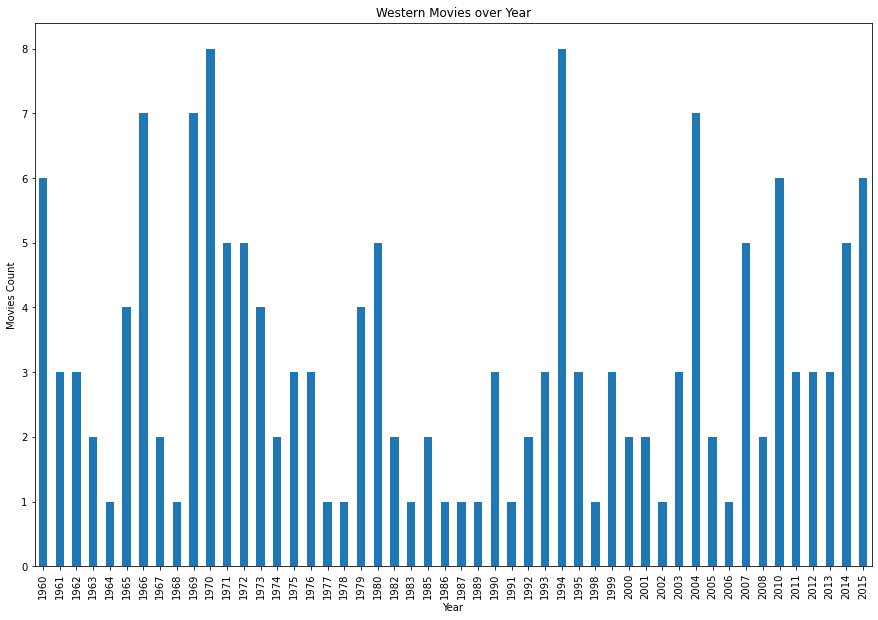

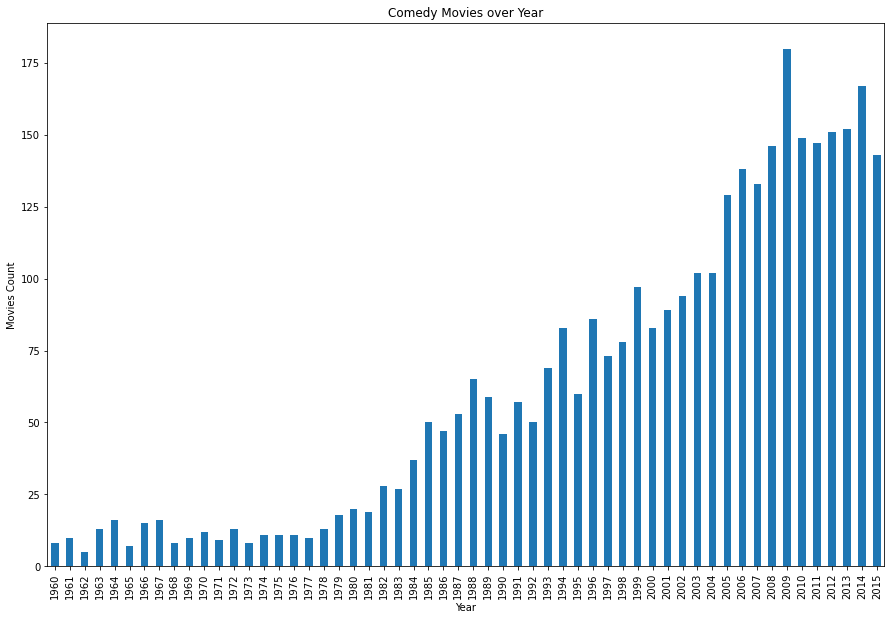

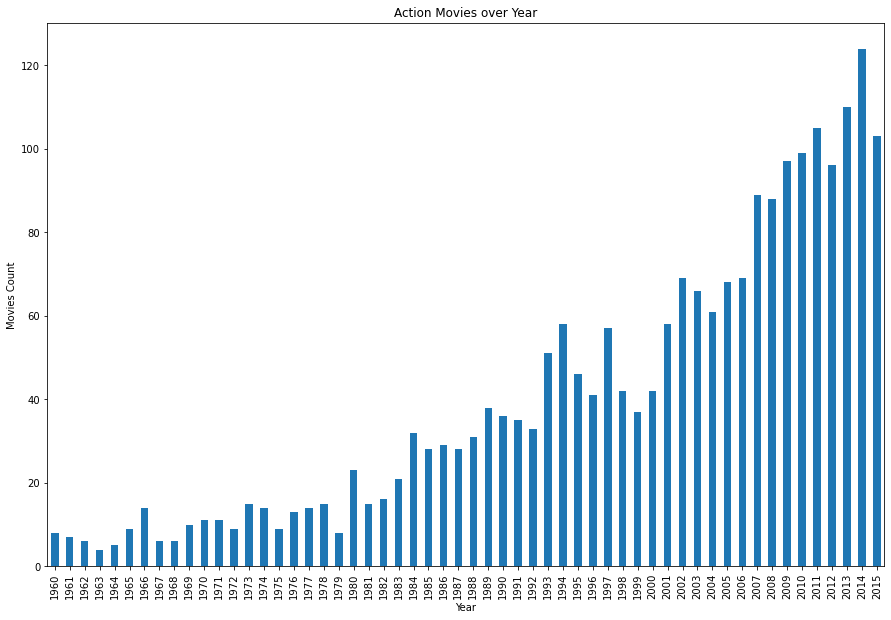

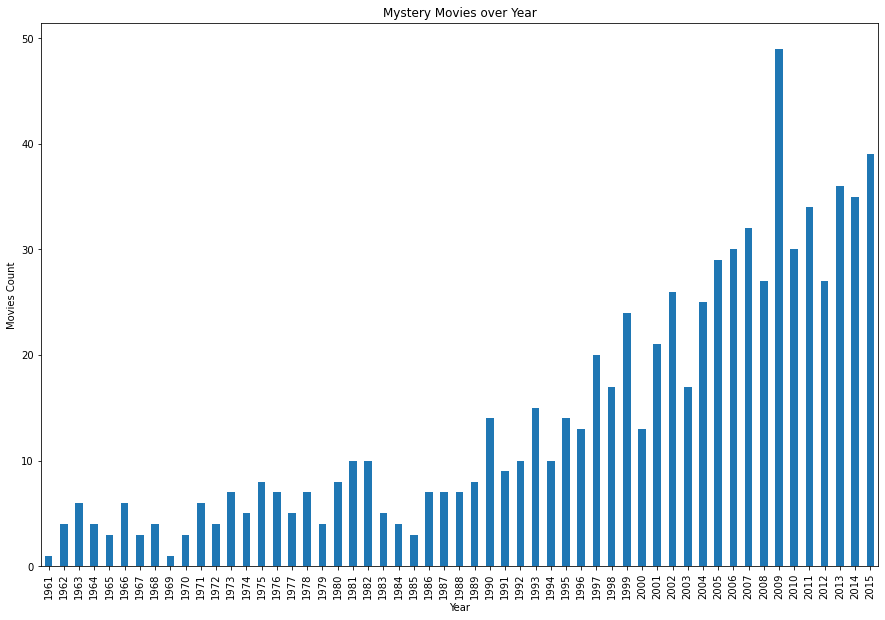

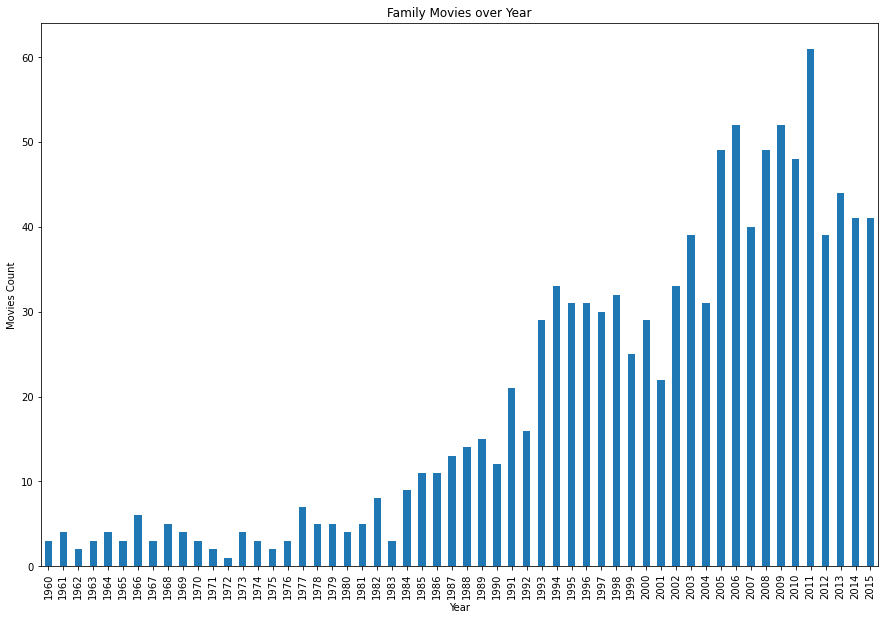

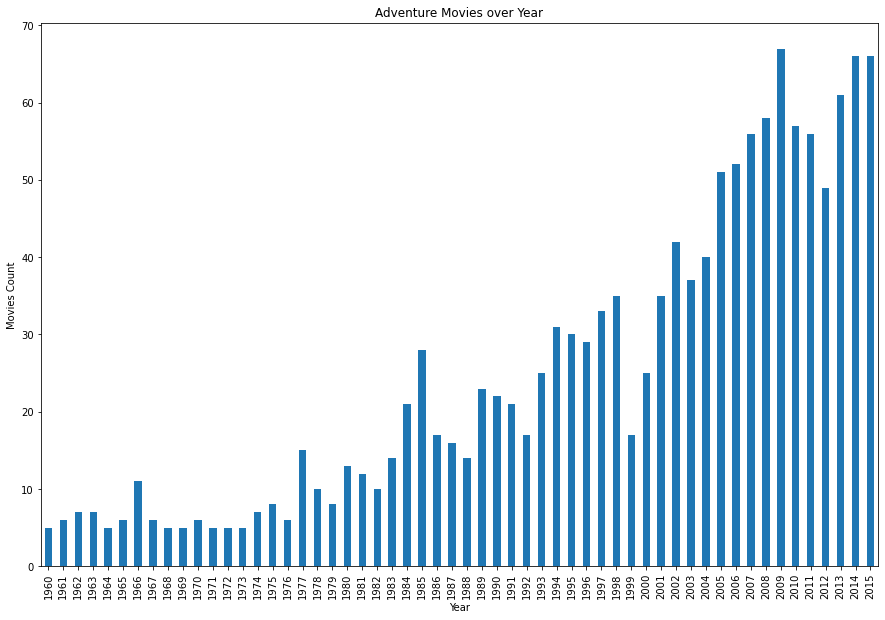

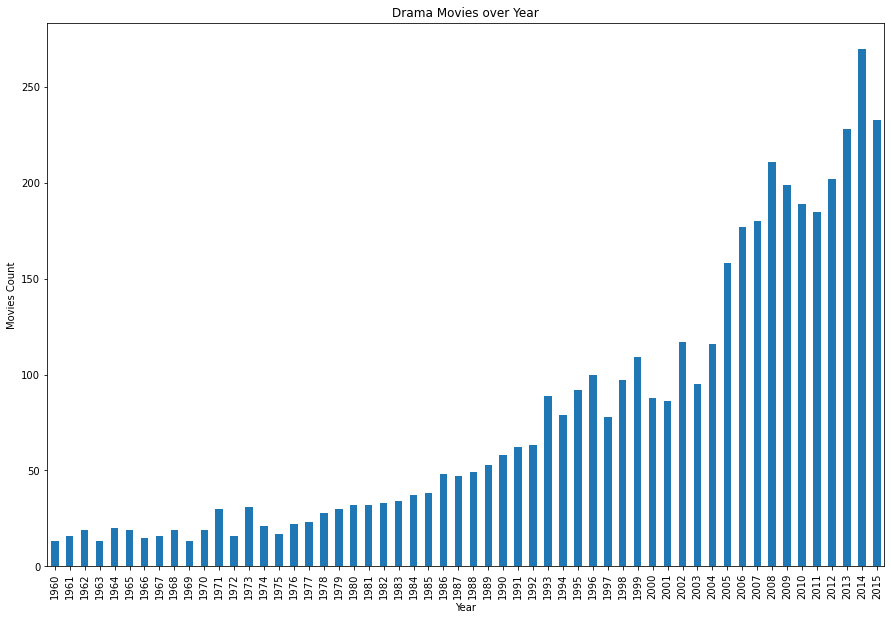

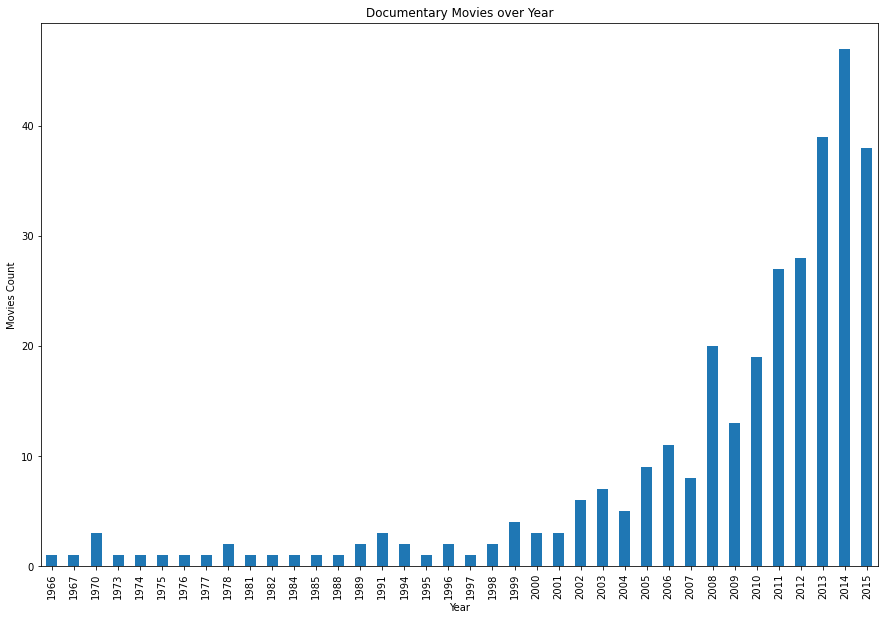

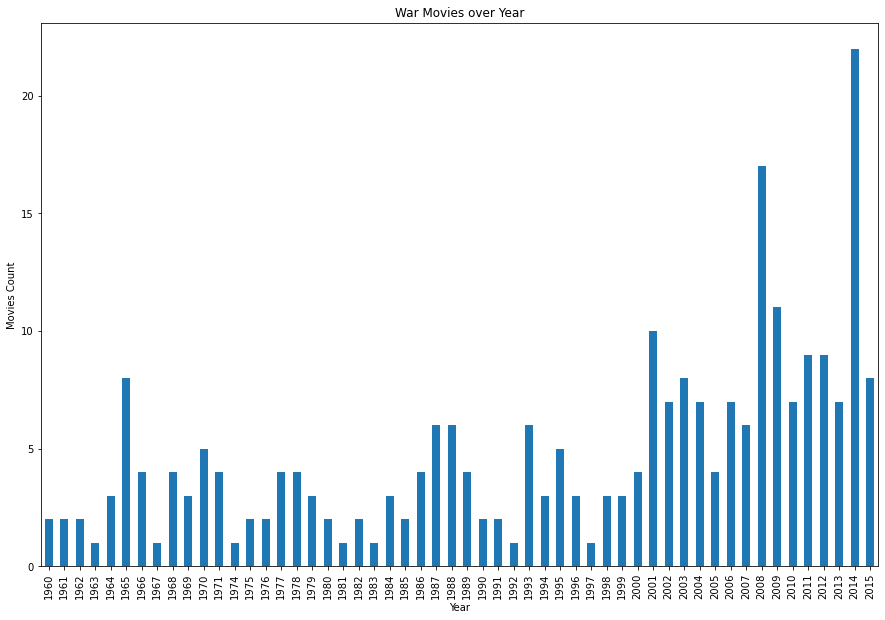

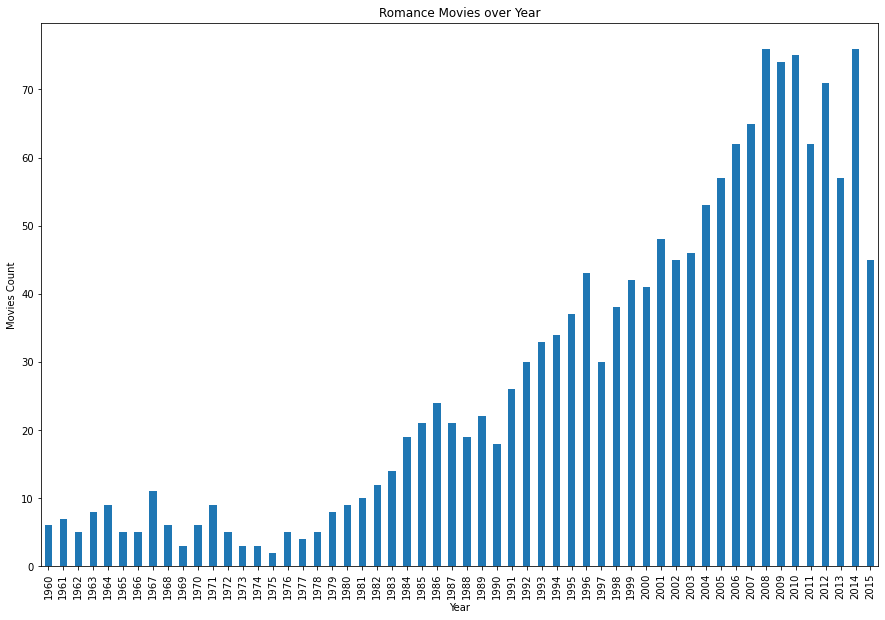

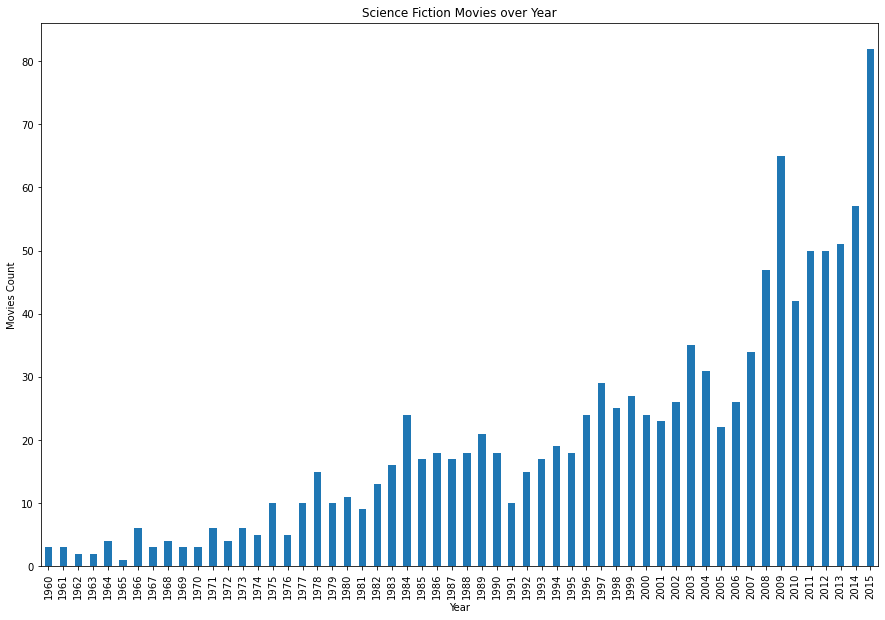

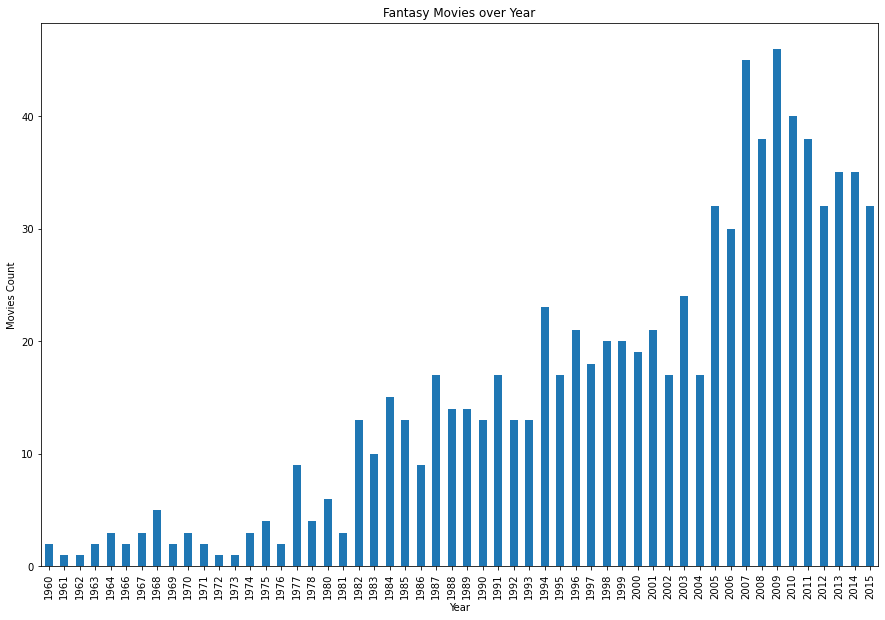

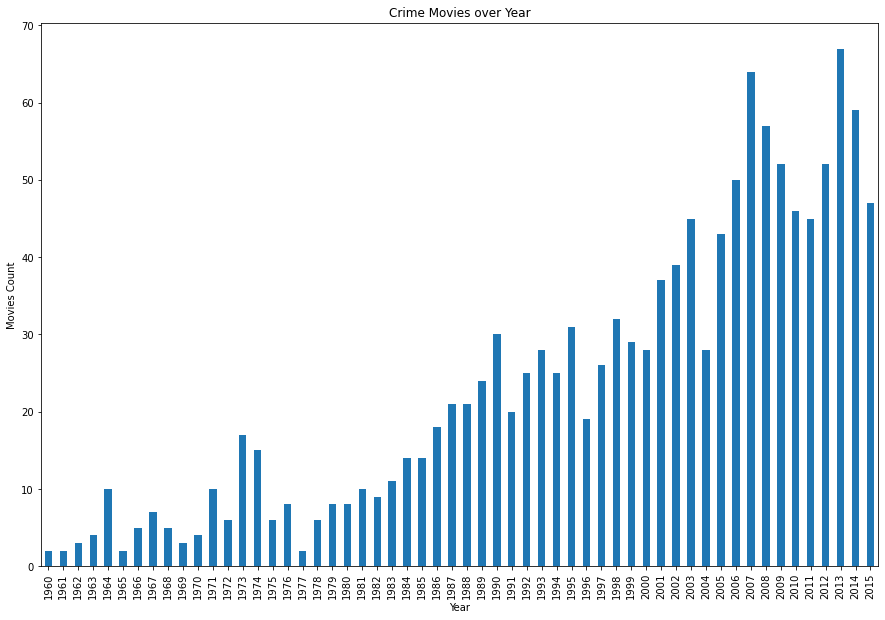

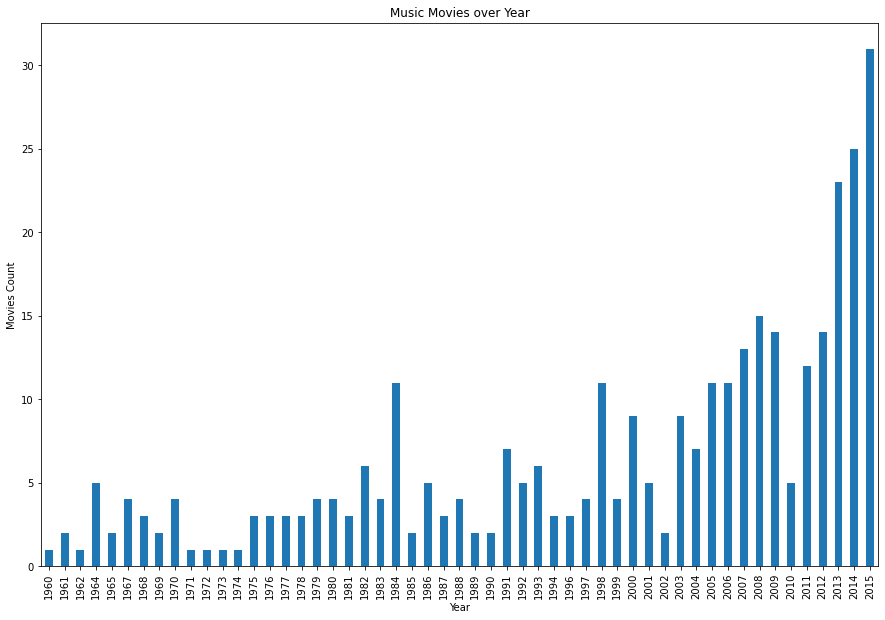

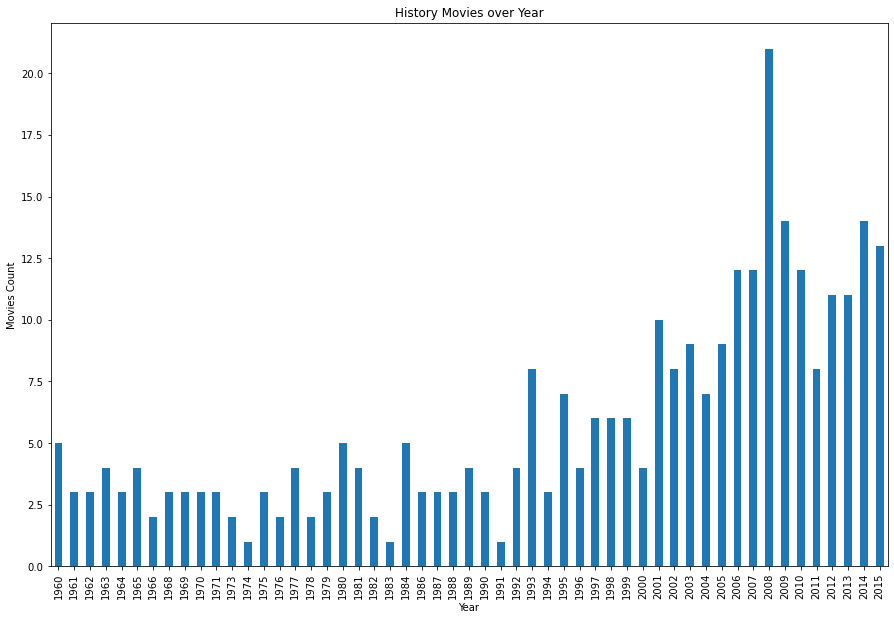

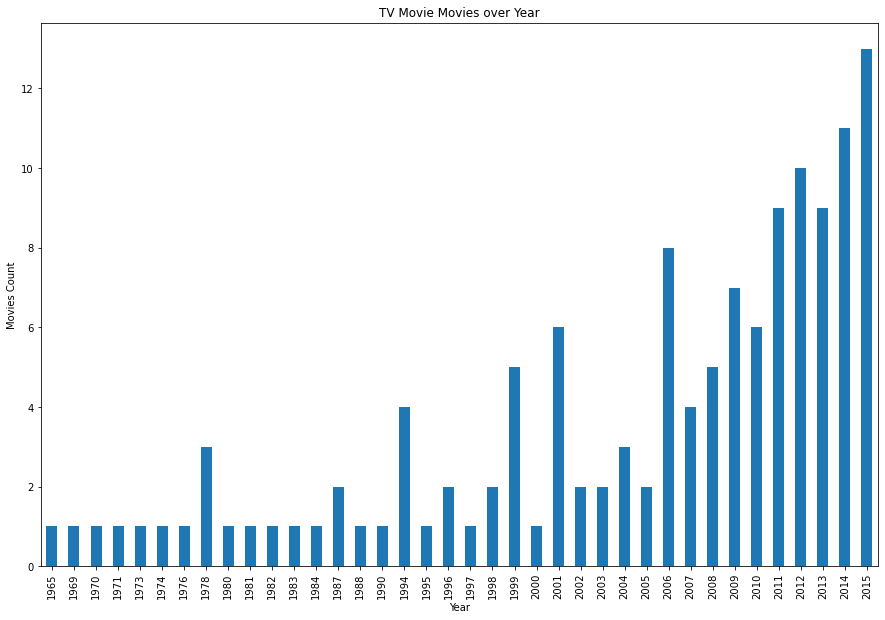

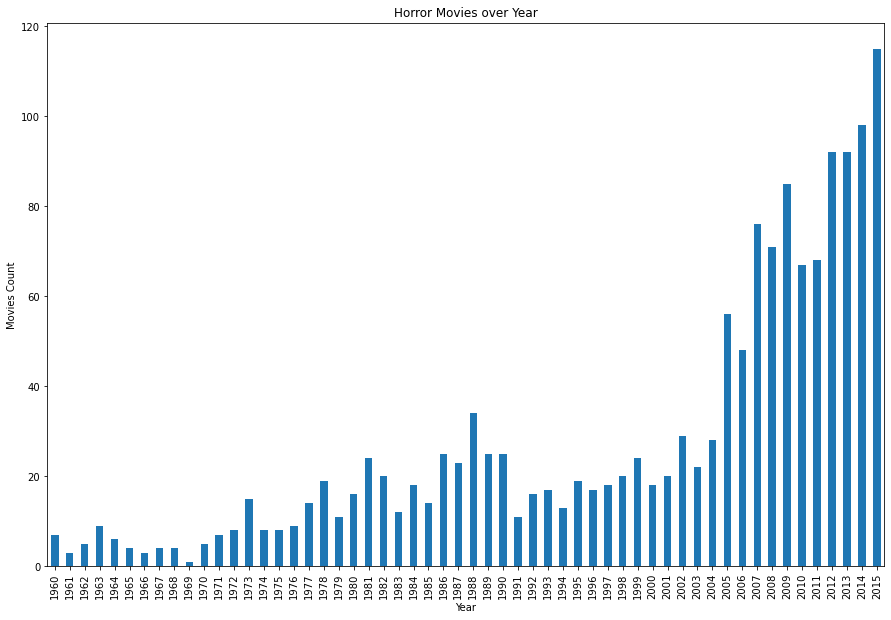

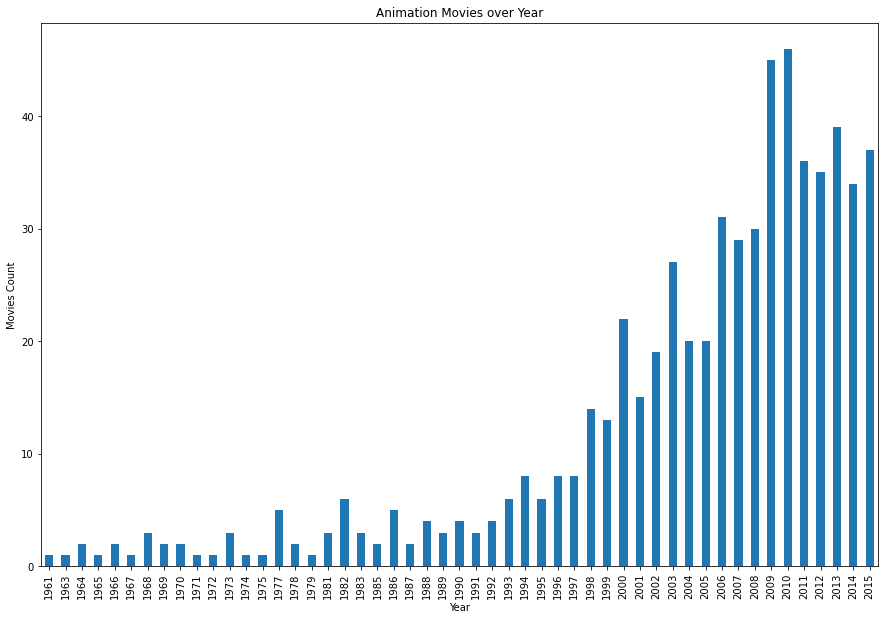

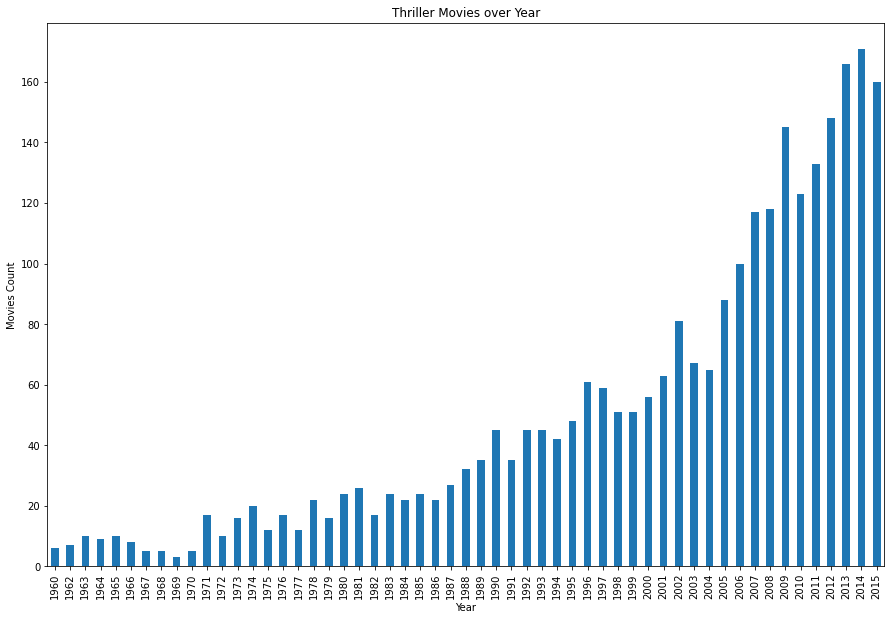

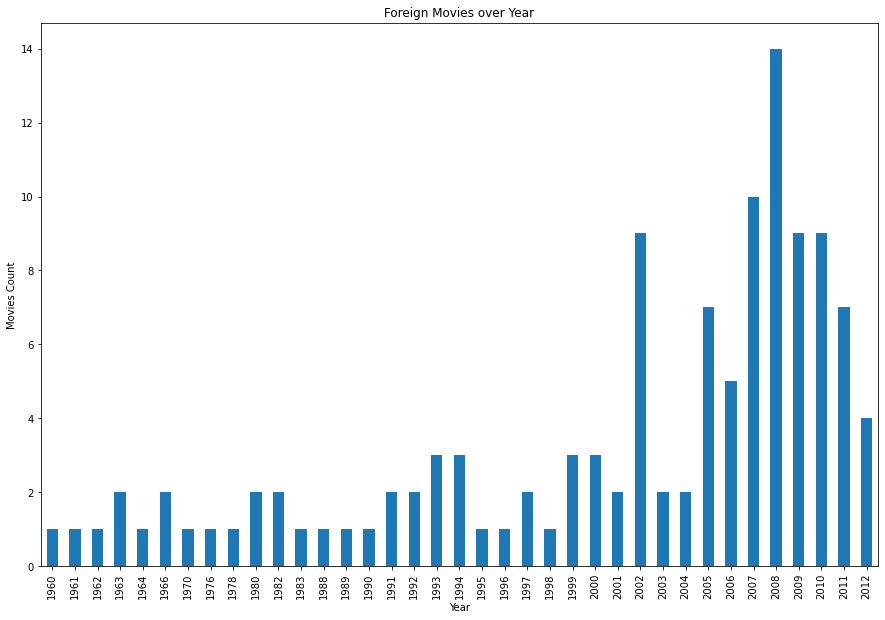

In [14]:
for genre in set(unique_genres(df, 'genres')):
    # create a dataframe for each genre
    genre_df = df[df.genres.str.contains('{}'.format(genre))]
    genre_df.groupby('release_year')['genres'].count().plot(kind='bar', figsize=(15,10))
    plt.xlabel('Year', fontsize=10)
    plt.ylabel('Movies Count', fontsize=10)
    plt.title('{} Movies over Year'.format(genre))
    plt.show();

#### Show the rate of production of each genre over year

### Research Question 2: How is popularity trending over time?

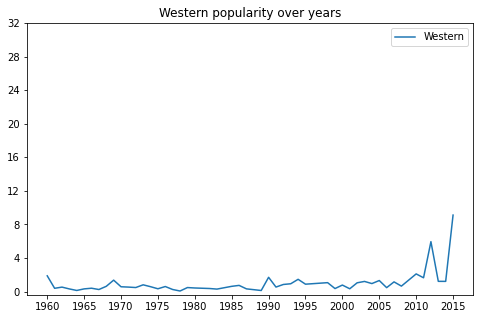

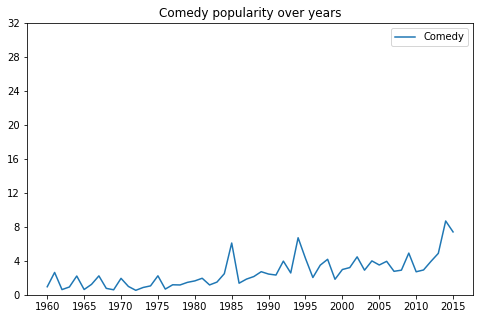

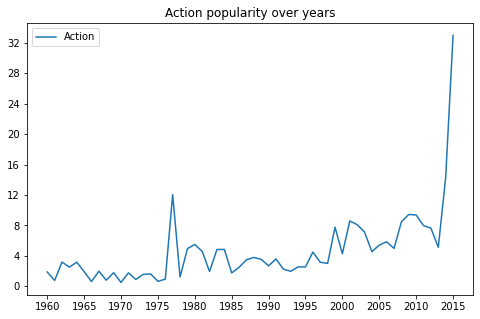

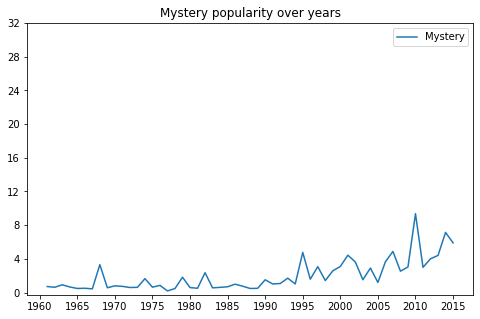

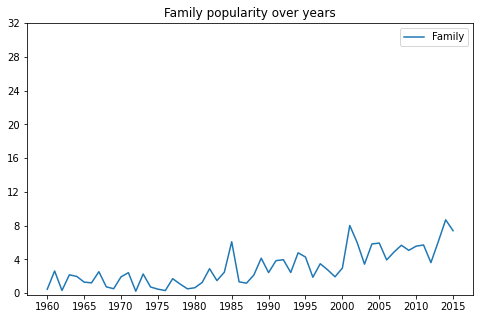

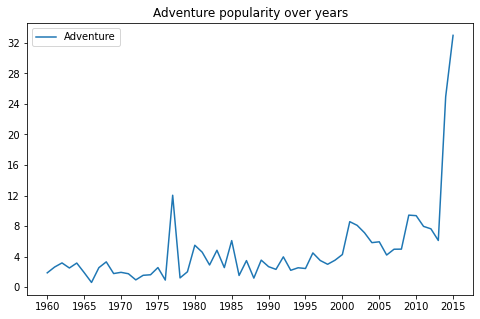

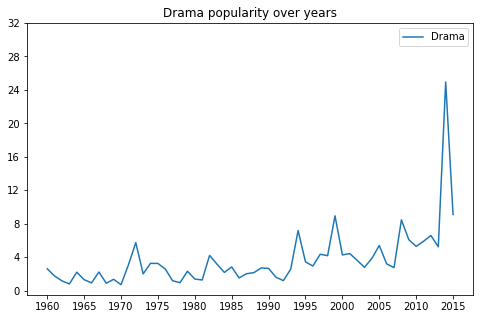

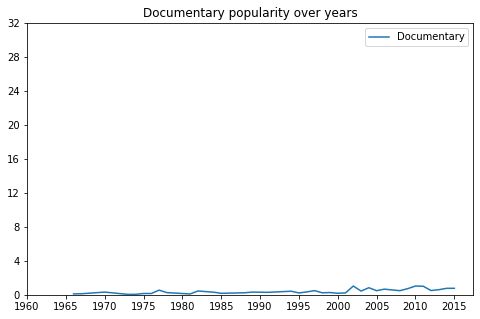

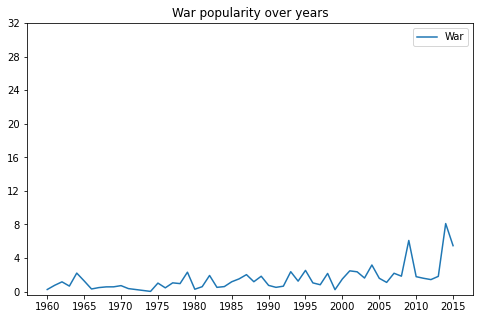

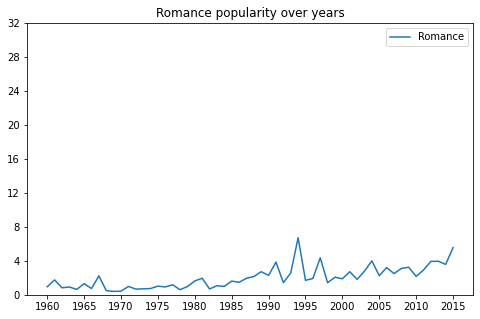

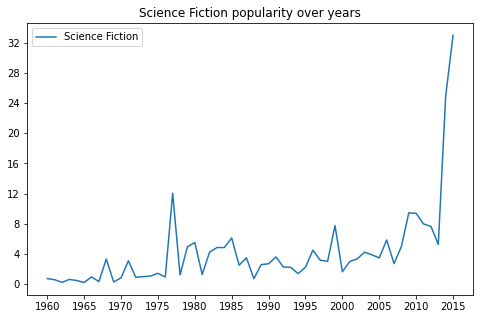

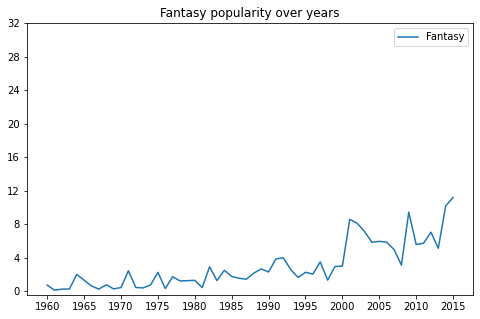

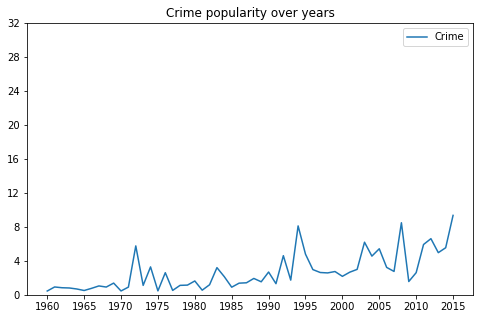

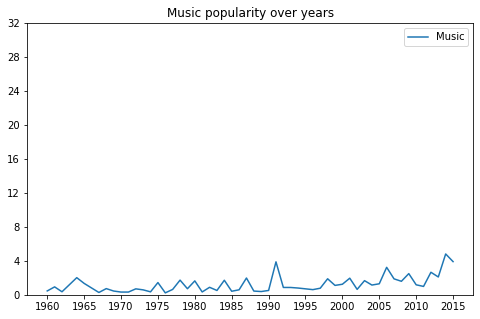

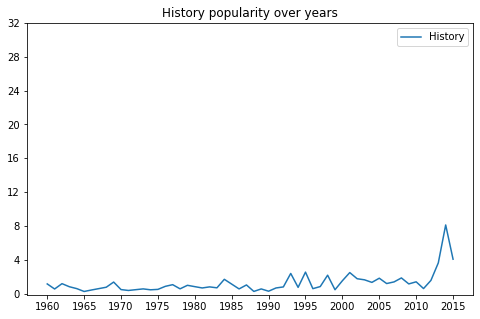

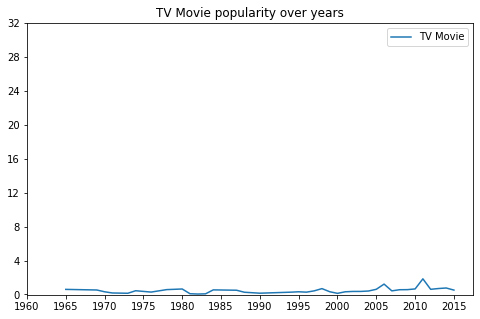

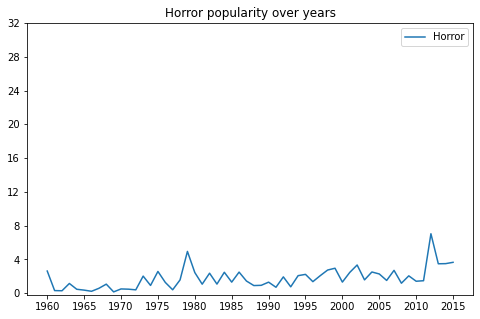

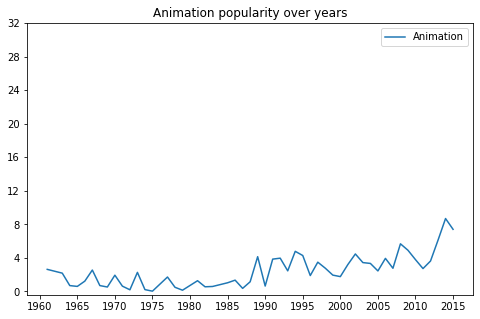

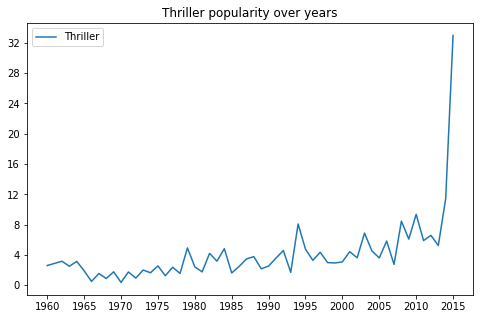

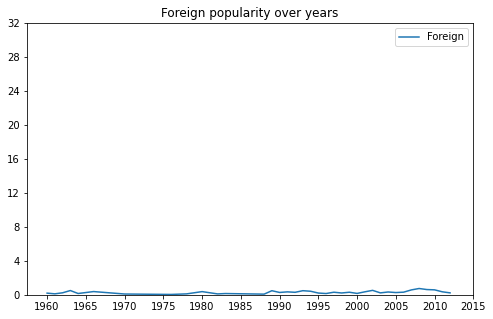

In [15]:
x_ticks = np.arange(1960, 2020, 5)
y_ticks = np.arange(0,33, 4)
for genre in set(unique_genres(df, 'genres')):
    data = df[df['genres'].str.contains("{}".format(genre))].groupby('release_year', as_index=False)['popularity'].max()
    plt.figure(figsize=(8,5))
    plt.plot(data.release_year, data.popularity, label="{}".format(genre))
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)
    plt.title('{} popularity over years'.format(genre))
    plt.legend()
    plt.show()


##### We could get how each genre popularity trend over years, the taste of the people for each genre over years

### Research Question 3: Do top ratings movies always generate big revenue?

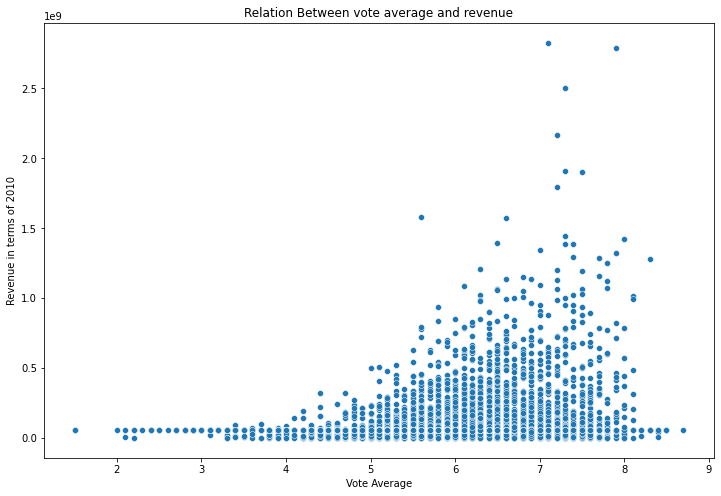

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x=df.vote_average, y=df.revenue_adj)
plt.title("Relation Between vote average and revenue")
plt.xlabel("Vote Average")
plt.ylabel("Revenue in terms of 2010")

plt.show()

#### We could see the impact of the users votes on the revenues

### Research Question 4: Do higher budget movies always generate big revenue?

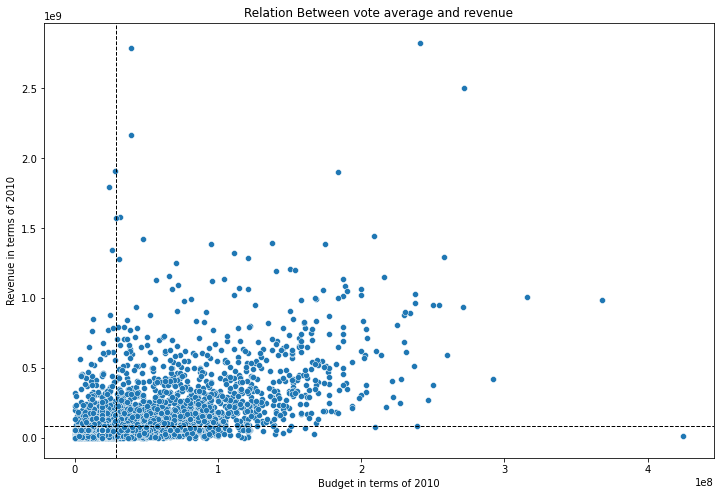

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x=df.budget_adj, y=df.revenue_adj)
plt.title("Relation Between vote average and revenue")
plt.xlabel("Budget in terms of 2010")
plt.ylabel("Revenue in terms of 2010")

# Benchmark Mean values          
plt.axhline(y=df.revenue_adj.mean(), color='k', linestyle='--', linewidth=1)           
plt.axvline(x=df.budget_adj.mean(), color='k',linestyle='--', linewidth=1) 

plt.show()

#### Getting the relation between the budget and revenues 

### Research Question 5: Which is the largest genres from production view?

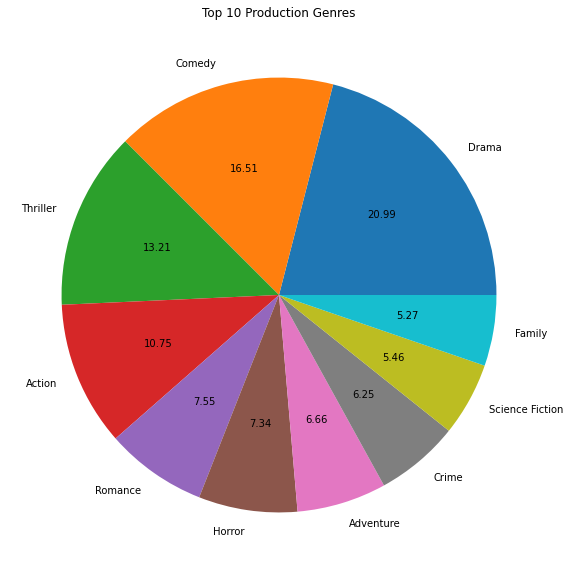

In [18]:
# Get the counts of each unique genre 
genres_counts = unique_genres(df, 'genres')
# plot as a pie chart
genres_counts.value_counts().nlargest(10).plot.pie(figsize=(10,10), autopct='%.2f')
plt.title('Top 10 Production Genres')
plt.ylabel('');

#### Top 10 genres in movies production

### Research Question 6: What is the biggest company in movie industry ?

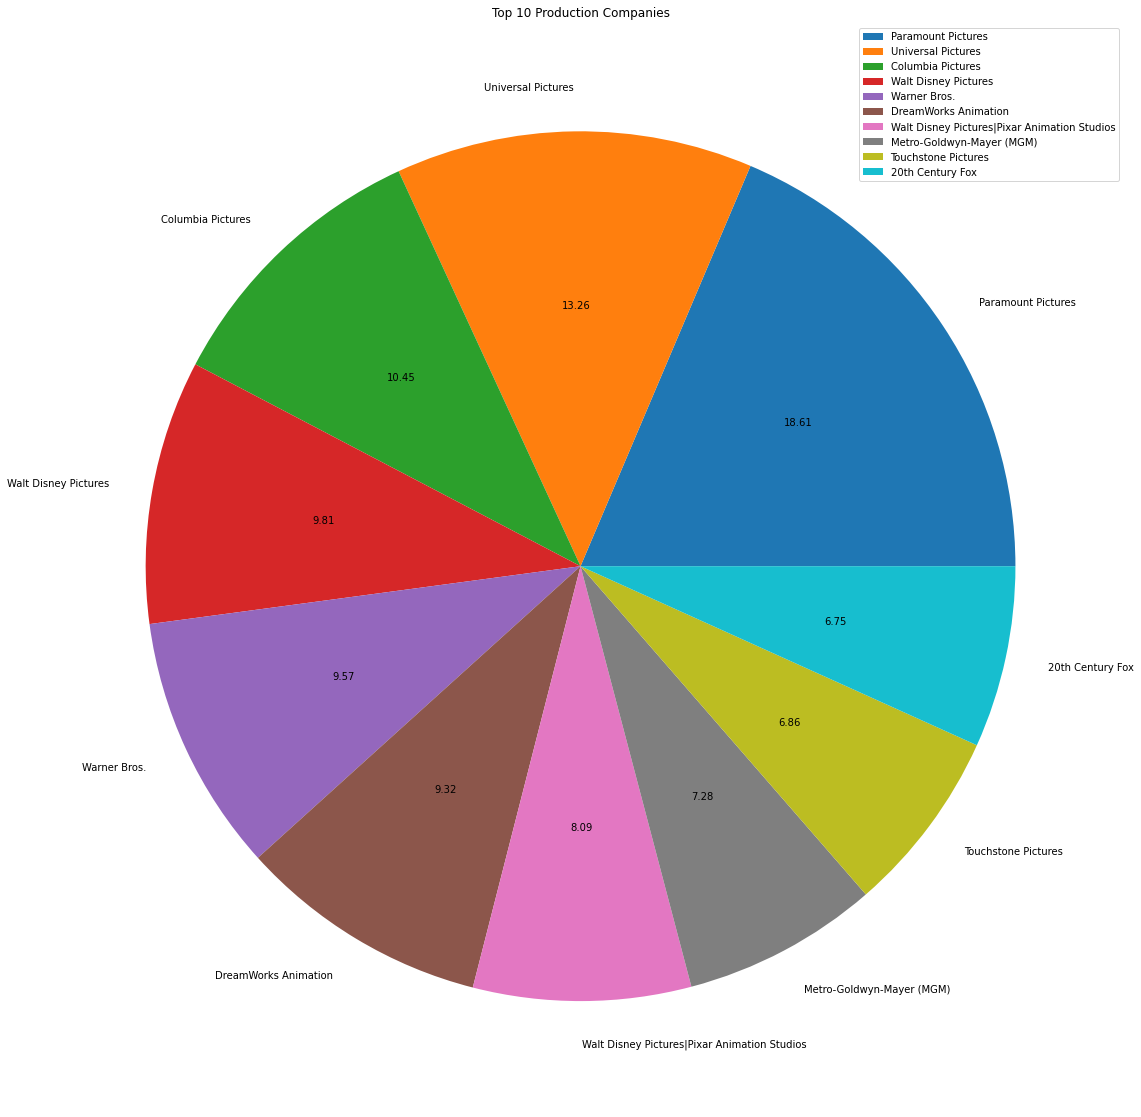

In [19]:
# Groupby Production company
production_companies = df.groupby('production_companies', as_index=False)['budget_adj'].sum().sort_values('budget_adj', ascending=False).head(10).set_index('production_companies')
production_companies.plot.pie(y='budget_adj',figsize=(30,20), autopct='%.2f')
plt.title('Top 10 Production Companies')
plt.ylabel('');


#### Percentage of the Top 10 Production Comapnies

### Research Question 7: Most Popular Directors?

###### Get the top 10 Directors

In [20]:
df.director.value_counts().nlargest(10)

Woody Allen          42
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      26
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Name: director, dtype: int64

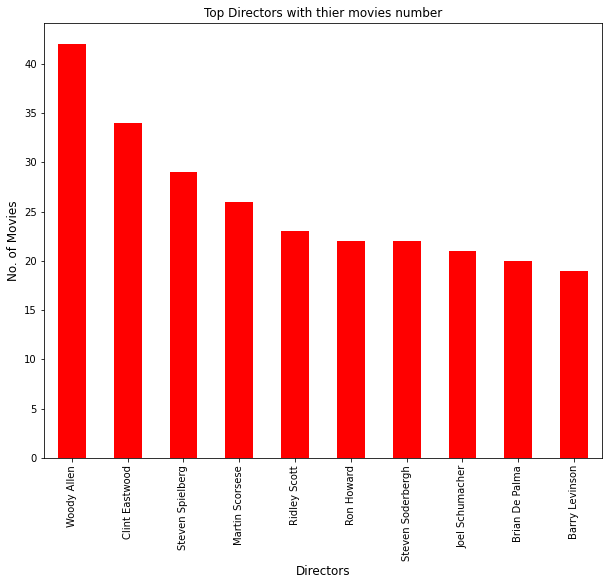

In [21]:
df.director.value_counts().nlargest(10)
df.director.value_counts().nlargest(10).plot(kind='bar', figsize=(10,8), color='red')
plt.xlabel('Directors', fontsize=12)
plt.ylabel('No. of Movies', fontsize=12)
plt.title('Top Directors with thier movies number');

#### Top 10 Directors with their movies numbers

<a id='conclusions'></a>
## Conclusions

###### Highest production year of each genre
>   Drama               2014<br>
    Comedy              2009<br>
    Thriller            2014<br>
    Action              2014<br>
    Adventure           2009<br>
    Crime               2013<br>
    Romance             2014<br>
    Science Fiction     2015<br>
    Family              2011<br>
    Fantasy             2009<br>
    Horror              2015<br>
    Animation           2010<br>
    Mystery             2009<br>
    War                 2014<br>
    History             2008<br>
    Music               2015<br>
    Western             1994<br>
    Documentary         2014<br>
    TV Movie            2015<br>
    Foreign             2008<br>

###### Geners Popularity over years
>    Popularity for (Action, Adventure , Thriller , Science Fiction) have significantly increased in the last five years.
However Drama which has the highest production, Its popularity has significantly decreased in the last year.


###### User Ratin impact on Revenues
>    
There is no impact for the user ratings on the revenue as the ratings my may high and still the revenues are low


###### Budget impact on Revenues
>    
In the most cases we can see that they have a direct proption relationship but it's not the most case, many movies has          high budgets and still has low revenues.


###### The top 3 companies in production 
>Rank One: Paramount Pictures<br>
Rank Two: Universal Pictures<br>
Rank Three: Columbia Pictures<br>

###### The top 3 genres in production
>Rank One: Drama<br>
Rank Two: Comedy<br>
Rank Three: Thriller<br>

###### Top 10 Directors with number of their movies
>   Woody Allen          42<br>
    Clint Eastwood       34<br>
    Steven Spielberg     29<br>
    Martin Scorsese      26<br>
    Ridley Scott         23<br>
    Steven Soderbergh    22<br>
    Ron Howard           22<br>
    Joel Schumacher      21<br>
    Brian De Palma       20<br>
    Barry Levinson       19<br>

## Limitations:
<ol>
    <li>We have used the provided dataset for the movies so our analysis is limited only to this data set</li>
    <li>Filling the zeros values with the mean value might skew our analysis and show unintentional bias</li>
</ol>

## Resources:
[Pandas Documentation](https://pandas.pydata.org/docs/#)<br>
[Matplotlib Documentation](https://www.kaggle.com/tmdb/tmdb-movie-metadata)<br>
[Kaggle TMDb dataset](https://matplotlib.org/3.3.3/contents.html#)<br>
